# all_speeches_scores

In [1]:
import pandas as pd

# Load the data from each analysis
vader_scores = pd.read_csv('vader_scores.csv')
textblob_scores = pd.read_csv('textblob_scores.csv')
pysentiment2_scores = pd.read_csv('pysentiment2_scores.csv')
finbert_scores = pd.read_csv('finbert_scores_raw_v2.csv')

In [2]:
# Renaming the vader_compound to vader_polarity for consistency with other models. 
vader_scores = vader_scores.rename(columns={'vader_compound': 'vader_polarity'})

In [3]:
# Merging using outer joins to add all columns

# Merge VADER scores with TextBlob scores on 'reference'
all_speeches_scores = pd.merge(vader_scores, textblob_scores[['reference', 'textblob_polarity']], on='reference', how='outer')

# Merge the result with PySentiment2 scores on 'reference'
all_speeches_scores = pd.merge(all_speeches_scores, pysentiment2_scores[['reference', 'lm_polarity']], on='reference', how='outer')

# Merge the result with FinBERT scores on 'reference'
all_speeches_scores = pd.merge(all_speeches_scores, finbert_scores[['reference','finbert_polarity']], on='reference', how='outer')

In [4]:
# Removing the clean text column as text already provides use, and removing vader polarity outputs. 
all_speeches_scores = all_speeches_scores.drop(columns=['clean_text', 'vader_pos', 'vader_neg', 'vader_neu' ])

In [5]:
# Adding a column to calculate word count of speeches
all_speeches_scores['word_count'] = all_speeches_scores['text'].apply(lambda x: len(x.split()))

In [6]:
# View the dataframe
all_speeches_scores.head()

reference         country        date  \
0  r980915a_BOE  United Kingdom  1998-09-15   
1  r981021b_BOE  United Kingdom  1998-10-21   
2  r981021a_BOE  United Kingdom  1998-10-21   
3  r981101a_BOE  United Kingdom  1998-11-01   
4  r981101b_BOE  United Kingdom  1998-11-01   

                                               title   author  is_gov  \
0                                             Speech   George   False   
1                                  Britain in Europe   George   False   
2  Impact of the recent turbulence in internation...     King    True   
3        Economic policy, with and without forecasts     Budd   False   
4  Inflation targeting in practice: the UK experi...  Vickers   False   

                                                text Body     central_bank  \
0  Thank you, Chairman. I'm actually very pleased...  BOE  Bank of England   
1  It's a great pleasure to be here in the beauti...  BOE  Bank of England   
2  Few industries have suffered more from volatil...  BOE  Bank of England   
3  My topic this evening is the use of forecasts ...  BOE  Bank of England   
4  Six years ago this week, sterling left the exc...  BOE  Bank of England   

   year language  vader_polarity  textblob_polarity  lm_polarity  \
0  1998       en          0.9968           0.074486    -0.418182   
1  1998       en          0.9999           0.064690    -0.100529   
2  1998       en          0.9982           0.075350    -0.372549   
3  1998       en          0.9997           0.066823    -0.142857   
4  1998       en          0.9988           0.059664    -0.406593   

   finbert_polarity  word_count  
0         -0.269212        2387  
1          0.331056        4045  
2         -0.638454        2311  
3         -0.000118        4690  
4         -0.002259        4452

In [7]:
# Re-ordering the columns for accesiblity. 
all_speeches_scores= all_speeches_scores[['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text', 'word_count', 'Body', 'central_bank', 'year', 'language', 'vader_polarity', 'textblob_polarity', 'lm_polarity', 'finbert_polarity']]

In [8]:
# Ensuring 'date' column is datetime format
all_speeches_scores['date'] = pd.to_datetime(all_speeches_scores['date'])

In [9]:
# Checking for missing values
nan_counts = all_speeches_scores.isna().sum()

# Display NaN counts for each column
print(nan_counts)

reference            0
country              0
date                 0
title                0
author               0
is_gov               0
text                 0
word_count           0
Body                 0
central_bank         0
year                 0
language             0
vader_polarity       0
textblob_polarity    0
lm_polarity          0
finbert_polarity     0
dtype: int64


In [10]:
# Checking for duplicates
duplicates_count = all_speeches_scores.duplicated().sum()

print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 0


In [11]:
# Save the merged DataFrame to CSV if needed
# all_speeches_scores.to_csv('all_speeches_scores.csv', index=False)

#### Sorting speeches into daily

In [12]:
# Removing the TextBlob column as it does not show useful insight as well as the text column which is no longer needed
all_speeches_scores_daily = all_speeches_scores.drop(columns=['textblob_polarity', 'text'])

In [13]:
# Ensure 'date' is in datetime format
all_speeches_scores_daily['date'] = pd.to_datetime(all_speeches_scores_daily['date'])

# Set 'date' as the index
all_speeches_scores_daily.set_index('date', inplace=True)

In [14]:
# Generate a daily date range covering the entire period of your data
start_date = all_speeches_scores_daily.index.min()
end_date = all_speeches_scores_daily.index.max()
daily_date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Create a DataFrame with the daily date range
daily_df = pd.DataFrame(index=daily_date_range)

# Merge the daily DataFrame with the original DataFrame using a left join
all_speeches_scores_daily = daily_df.merge(all_speeches_scores_daily, how='left', left_index=True, right_index=True)

# Forward fill the missing values
all_speeches_scores_daily = all_speeches_scores_daily.ffill()

In [15]:
# Checking the indexing was successful  
print(all_speeches_scores_daily.index)

DatetimeIndex(['1998-09-15', '1998-09-16', '1998-09-17', '1998-09-18',
               '1998-09-19', '1998-09-20', '1998-09-21', '1998-09-22',
               '1998-09-23', '1998-09-24',
               ...
               '2022-10-11', '2022-10-12', '2022-10-13', '2022-10-14',
               '2022-10-15', '2022-10-16', '2022-10-17', '2022-10-18',
               '2022-10-19', '2022-10-20'],
              dtype='datetime64[ns]', length=8917, freq=None)


In [16]:
# Viewing the dataframe
all_speeches_scores_daily

reference         country  \
1998-09-15  r980915a_BOE  United Kingdom   
1998-09-16  r980915a_BOE  United Kingdom   
1998-09-17  r980915a_BOE  United Kingdom   
1998-09-18  r980915a_BOE  United Kingdom   
1998-09-19  r980915a_BOE  United Kingdom   
...                  ...             ...   
2022-10-16  r221015a_BOE  United Kingdom   
2022-10-17  r221015a_BOE  United Kingdom   
2022-10-18  r221015a_BOE  United Kingdom   
2022-10-19  r221019a_BOE  United Kingdom   
2022-10-20  r221020a_BOE  United Kingdom   

                                                        title     author  \
1998-09-15                                             Speech     George   
1998-09-16                                             Speech     George   
1998-09-17                                             Speech     George   
1998-09-18                                             Speech     George   
1998-09-19                                             Speech     George   
...                                                       ...        ...   
2022-10-16  Monetary policy and financial stability interv...     Bailey   
2022-10-17  Monetary policy and financial stability interv...     Bailey   
2022-10-18  Monetary policy and financial stability interv...     Bailey   
2022-10-19  Governance of “Decentralised” Finance: Get up,...    Wilkins   
2022-10-20       The inflationary consequences of real shocks  Broadbent   

            is_gov  word_count Body     central_bank    year language  \
1998-09-15   False      2387.0  BOE  Bank of England  1998.0       en   
1998-09-16   False      2387.0  BOE  Bank of England  1998.0       en   
1998-09-17   False      2387.0  BOE  Bank of England  1998.0       en   
1998-09-18   False      2387.0  BOE  Bank of England  1998.0       en   
1998-09-19   False      2387.0  BOE  Bank of England  1998.0       en   
...            ...         ...  ...              ...     ...      ...   
2022-10-16    True      1767.0  BOE  Bank of England  2022.0       en   
2022-10-17    True      1767.0  BOE  Bank of England  2022.0       en   
2022-10-18    True      1767.0  BOE  Bank of England  2022.0       en   
2022-10-19   False      5382.0  BOE  Bank of England  2022.0       en   
2022-10-20   False      6035.0  BOE  Bank of England  2022.0       en   

            vader_polarity  lm_polarity  finbert_polarity  
1998-09-15          0.9968    -0.418182         -0.269212  
1998-09-16          0.9968    -0.418182         -0.269212  
1998-09-17          0.9968    -0.418182         -0.269212  
1998-09-18          0.9968    -0.418182         -0.269212  
1998-09-19          0.9968    -0.418182         -0.269212  
...                    ...          ...               ...  
2022-10-16         -0.9848    -0.600000         -0.070586  
2022-10-17         -0.9848    -0.600000         -0.070586  
2022-10-18         -0.9848    -0.600000         -0.070586  
2022-10-19          0.9999     0.287234          0.000144  
2022-10-20          0.9994    -0.306306          0.001301  

[8917 rows x 13 columns]

In [17]:
# Check data types of all columns
print(all_speeches_scores_daily.dtypes)

reference            object
country              object
title                object
author               object
is_gov                 bool
word_count          float64
Body                 object
central_bank         object
year                float64
language             object
vader_polarity      float64
lm_polarity         float64
finbert_polarity    float64
dtype: object


In [18]:
# Convert 'year' and 'word_count' columns to integer
all_speeches_scores_daily[['year', 'word_count']] = all_speeches_scores_daily[['year', 'word_count']].astype(int)

In [19]:
all_speeches_scores_daily

reference         country  \
1998-09-15  r980915a_BOE  United Kingdom   
1998-09-16  r980915a_BOE  United Kingdom   
1998-09-17  r980915a_BOE  United Kingdom   
1998-09-18  r980915a_BOE  United Kingdom   
1998-09-19  r980915a_BOE  United Kingdom   
...                  ...             ...   
2022-10-16  r221015a_BOE  United Kingdom   
2022-10-17  r221015a_BOE  United Kingdom   
2022-10-18  r221015a_BOE  United Kingdom   
2022-10-19  r221019a_BOE  United Kingdom   
2022-10-20  r221020a_BOE  United Kingdom   

                                                        title     author  \
1998-09-15                                             Speech     George   
1998-09-16                                             Speech     George   
1998-09-17                                             Speech     George   
1998-09-18                                             Speech     George   
1998-09-19                                             Speech     George   
...                                                       ...        ...   
2022-10-16  Monetary policy and financial stability interv...     Bailey   
2022-10-17  Monetary policy and financial stability interv...     Bailey   
2022-10-18  Monetary policy and financial stability interv...     Bailey   
2022-10-19  Governance of “Decentralised” Finance: Get up,...    Wilkins   
2022-10-20       The inflationary consequences of real shocks  Broadbent   

            is_gov  word_count Body     central_bank  year language  \
1998-09-15   False        2387  BOE  Bank of England  1998       en   
1998-09-16   False        2387  BOE  Bank of England  1998       en   
1998-09-17   False        2387  BOE  Bank of England  1998       en   
1998-09-18   False        2387  BOE  Bank of England  1998       en   
1998-09-19   False        2387  BOE  Bank of England  1998       en   
...            ...         ...  ...              ...   ...      ...   
2022-10-16    True        1767  BOE  Bank of England  2022       en   
2022-10-17    True        1767  BOE  Bank of England  2022       en   
2022-10-18    True        1767  BOE  Bank of England  2022       en   
2022-10-19   False        5382  BOE  Bank of England  2022       en   
2022-10-20   False        6035  BOE  Bank of England  2022       en   

            vader_polarity  lm_polarity  finbert_polarity  
1998-09-15          0.9968    -0.418182         -0.269212  
1998-09-16          0.9968    -0.418182         -0.269212  
1998-09-17          0.9968    -0.418182         -0.269212  
1998-09-18          0.9968    -0.418182         -0.269212  
1998-09-19          0.9968    -0.418182         -0.269212  
...                    ...          ...               ...  
2022-10-16         -0.9848    -0.600000         -0.070586  
2022-10-17         -0.9848    -0.600000         -0.070586  
2022-10-18         -0.9848    -0.600000         -0.070586  
2022-10-19          0.9999     0.287234          0.000144  
2022-10-20          0.9994    -0.306306          0.001301  

[8917 rows x 13 columns]

In [20]:
# Save the new complete DataFrame to CSV if needed while including the index to keep 'date' visible
# all_speeches_scores_daily.to_csv('all_speeches_scores_daily.csv', index=True)

## Polarity

#### Average sentiment score per year

In [21]:
# Ensuring that 'date' is the correct format
all_speeches_scores_daily['date'] = pd.to_datetime(all_speeches_scores['date'])

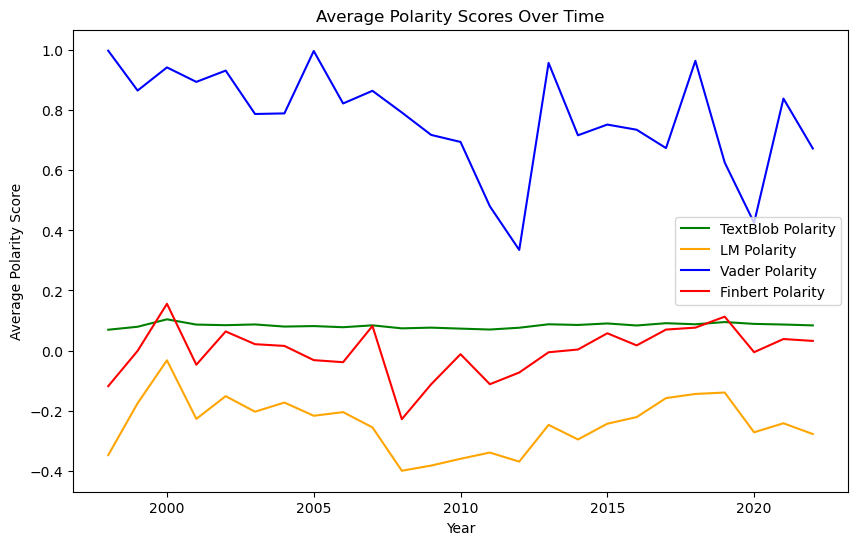

In [22]:
import matplotlib.pyplot as plt

# Define colors for each sentiment model
colors = {
    'textblob': 'green',
    'lm': 'orange',
    'vader': 'blue',
    'finbert': 'red'
}

# Investigating simple time series of all polarity scores by using averages.
avg_polarity_by_year = all_speeches_scores.groupby('year').agg({
    'textblob_polarity': 'mean',
    'lm_polarity': 'mean',
    'vader_polarity': 'mean',
    'finbert_polarity': 'mean'
}).reset_index()

# Plotting the average polarity scores over time
plt.figure(figsize=(10, 6))
plt.plot(avg_polarity_by_year['year'], avg_polarity_by_year['textblob_polarity'], label='TextBlob Polarity', color=colors['textblob'])
plt.plot(avg_polarity_by_year['year'], avg_polarity_by_year['lm_polarity'], label='LM Polarity', color=colors['lm'])
plt.plot(avg_polarity_by_year['year'], avg_polarity_by_year['vader_polarity'], label='Vader Polarity', color=colors['vader'])
plt.plot(avg_polarity_by_year['year'], avg_polarity_by_year['finbert_polarity'], label='Finbert Polarity', color=colors['finbert'])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Polarity Score')
plt.title('Average Polarity Scores Over Time')
plt.legend()

# Displaying the plot
plt.show()


#### Increasing detail of x axis for further insight

In [23]:
# Plotting the mean average sentiment scores for each model and then plotting them per year against each other. 
plt.figure(figsize=(14, 8))

# Plotting TextBlob polarity
plt.plot(avg_polarity_by_year['year'], avg_polarity_by_year['textblob_polarity'], label='TextBlob Polarity', marker='v', color='green')

# Plotting LM polarity
plt.plot(avg_polarity_by_year['year'], avg_polarity_by_year['lm_polarity'], label='LM Polarity', marker='o', color='orange')

# Plotting VADER polarity
plt.plot(avg_polarity_by_year['year'], avg_polarity_by_year['vader_polarity'], label='VADER Polarity', marker='^', color='blue')

# Plotting FinBert polarity
plt.plot(avg_polarity_by_year['year'], avg_polarity_by_year['finbert_polarity'], label='FinBert Polarity', marker='s', color='red')

plt.title('Average Sentiment Scores by Year')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)

# Setting x-axis to show each year
plt.xticks(avg_polarity_by_year['year'].unique(), rotation=45) 

plt.tight_layout()
plt.show()


#### Average sentiment score per quarter

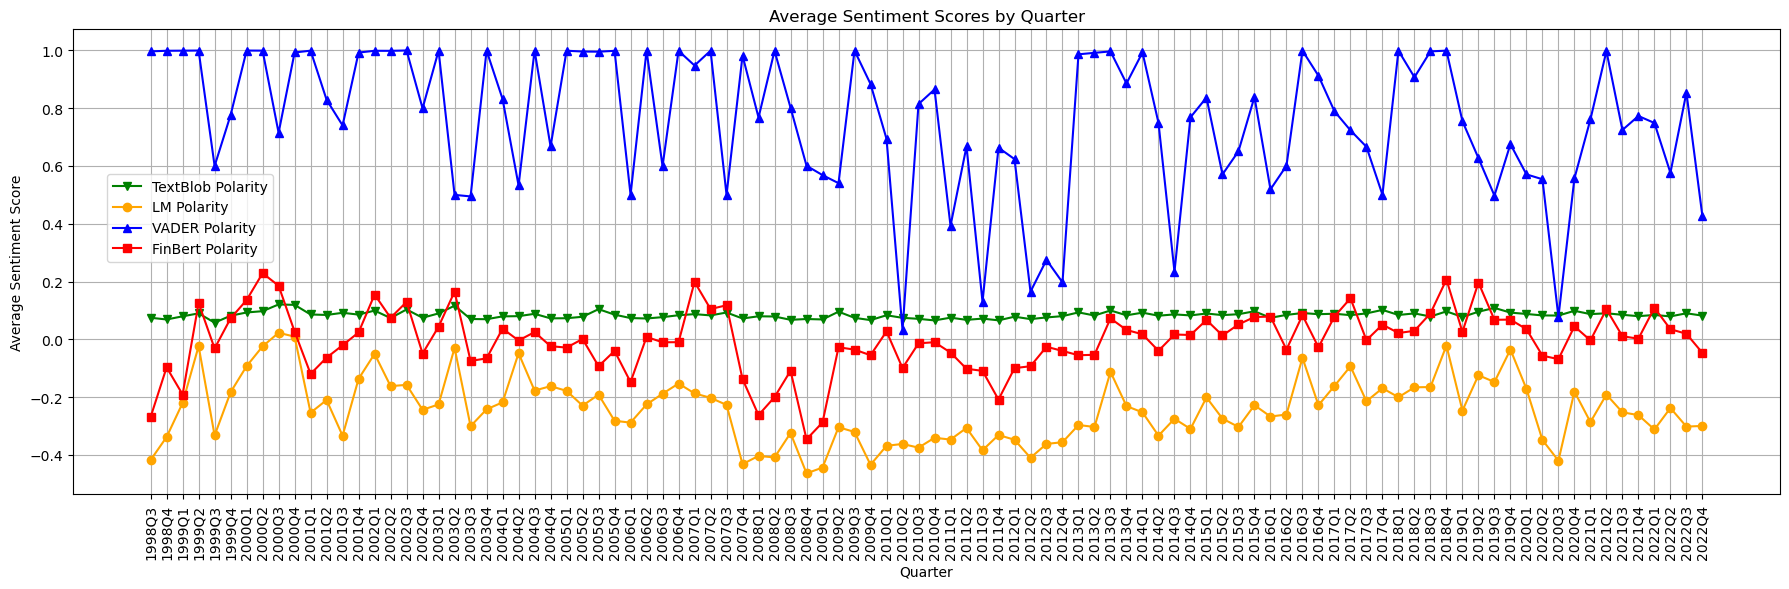

In [24]:
# Average sentiment Scores by Quarter

# Create the 'quarter' column
all_speeches_scores['quarter'] = all_speeches_scores['date'].dt.to_period('Q')

# Aggregate by 'quarter'
avg_polarity_by_quarter = all_speeches_scores.groupby('quarter').agg({
    'textblob_polarity': 'mean',
    'lm_polarity': 'mean',
    'vader_polarity': 'mean',
    'finbert_polarity': 'mean'
}).reset_index()

# Convert 'quarter' from Period to string for plotting
avg_polarity_by_quarter['quarter'] = avg_polarity_by_quarter['quarter'].astype(str)

# Define colors for each sentiment score
colors = {
    'textblob': 'green',
    'lm': 'orange',
    'vader': 'blue',
    'finbert': 'red'
}

# Plotting setup
plt.figure(figsize=(18, 6))

# Plot each sentiment score with specified colors
plt.plot(avg_polarity_by_quarter['quarter'], avg_polarity_by_quarter['textblob_polarity'], label='TextBlob Polarity', color=colors['textblob'], marker='v')
plt.plot(avg_polarity_by_quarter['quarter'], avg_polarity_by_quarter['lm_polarity'], label='LM Polarity', color=colors['lm'], marker='o')
plt.plot(avg_polarity_by_quarter['quarter'], avg_polarity_by_quarter['vader_polarity'], label='VADER Polarity', color=colors['vader'], marker='^')
plt.plot(avg_polarity_by_quarter['quarter'], avg_polarity_by_quarter['finbert_polarity'], label='FinBert Polarity', color=colors['finbert'], marker='s')

# Plot adjustments
plt.title('Average Sentiment Scores by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=90)
plt.legend(loc=(0.02, 0.5))
plt.grid(True)

plt.tight_layout()
plt.show()

#### Interactive weekly sentiment score smoothing with plotted individual Vader data points

In [25]:
# Creating a daily speech chart plotting all polarity scores with interactivity to find specific speeches using Vader. 

import plotly.graph_objects as go

# Define colors for each sentiment type
colors = {
    'lm': 'orange',
    'textblob': 'green',
    'vader': 'blue',
    'finbert': 'red'
}

# Sort values by date to ensure correctness in plotting
all_speeches_scores.sort_values('date', inplace=True)

# Calculate smoothed polarity scores for LM, TextBlob, VADER, and FinBERT
all_speeches_scores['lm_polarity_smooth'] = all_speeches_scores['lm_polarity'].rolling(window=7, min_periods=1).mean()
all_speeches_scores['textblob_polarity_smooth'] = all_speeches_scores['textblob_polarity'].rolling(window=7, min_periods=1).mean()
all_speeches_scores['vader_polarity_smooth'] = all_speeches_scores['vader_polarity'].rolling(window=7, min_periods=1).mean()
all_speeches_scores['finbert_polarity_smooth'] = all_speeches_scores['finbert_polarity'].rolling(window=7, min_periods=1).mean()

# Create the figure
fig = go.Figure()

# Add smoothed polarity lines for each sentiment type
fig.add_trace(go.Scatter(x=all_speeches_scores['date'], y=all_speeches_scores['lm_polarity_smooth'], mode='lines', name='LM Polarity Smoothed', line=dict(color=colors['lm'])))
fig.add_trace(go.Scatter(x=all_speeches_scores['date'], y=all_speeches_scores['textblob_polarity_smooth'], mode='lines', name='TextBlob Polarity Smoothed', line=dict(color=colors['textblob'])))
fig.add_trace(go.Scatter(x=all_speeches_scores['date'], y=all_speeches_scores['vader_polarity_smooth'], mode='lines', name='Vader Polarity Smoothed', line=dict(color=colors['vader'])))
fig.add_trace(go.Scatter(x=all_speeches_scores['date'], y=all_speeches_scores['finbert_polarity_smooth'], mode='lines', name='FinBert Polarity Smoothed', line=dict(color=colors['finbert'])))

# Add raw data points for FinBERT polarity, including 'reference' and 'author' in hover info
fig.add_trace(go.Scatter(x=all_speeches_scores['date'], y=all_speeches_scores['finbert_polarity'], mode='markers', name='FinBERT Speeches',
                         text=all_speeches_scores['author'] + ' | ' + all_speeches_scores['reference'], hoverinfo='text+y',
                         marker=dict(size=5, opacity=0.5, color='crimson')))

# Update layout
fig.update_layout(
    title='Interactive Daily Sentiment Scores',
    xaxis_title='Date',
    yaxis_title='Polarity Score',
    hovermode='x unified',
    width=1200,
    height=600
)

# Enable zoom & pan
fig.update_layout(xaxis={'rangeslider': {'visible': True}, 'type': 'date'})

fig.show()

> The individual daily speech data points are chosen from FinBERT as it is our most useful model.

In [26]:
# Exporting it as an HTML
import plotly.io as pio

# Specify the filename for the HTML file
# html_file = "daily_speech_sentiment_plot.html"

# Write the figure to an HTML file
# pio.write_html(fig, html_file)

# Print a message indicating where the HTML file is saved
# print(f"Plot saved as {html_file}")

In [27]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: D:\Users\burts\Downloads\LSE\Employer Project\Data\Speech data\All_Speeches


## General Analysis

#### Sentiment Analysis by Author

In [28]:
# Grouping data by author and calculating mean sentiment scores
author_sentiment = all_speeches_scores.groupby('author')[['textblob_polarity','vader_polarity', 'lm_polarity', 'finbert_polarity']].mean().sort_values(by='finbert_polarity', ascending=False)

# Displaying the top 5 most positive authors according to FinBert polarity
print(author_sentiment.head())

          textblob_polarity  vader_polarity  lm_polarity  finbert_polarity
author                                                                    
Benjamin           0.153439        0.999500     0.185185          0.630510
Cleland            0.133428        0.999767     0.281034          0.478887
Summit             0.089775        0.999600     0.079646          0.368119
Mills              0.081409        0.999900     0.085106          0.332368
Sheppard           0.127390        0.999900     0.204819          0.328264


In [29]:
# Grouping data by author and calculating mean sentiment scores
author_sentiment = all_speeches_scores.groupby('author')[['textblob_polarity','vader_polarity', 'lm_polarity', 'finbert_polarity']].mean().sort_values(by='finbert_polarity', ascending=True)

# Displaying the top 5 most negative authors according to FinBert polarity
print(author_sentiment.head())

        textblob_polarity  vader_polarity  lm_polarity  finbert_polarity
author                                                                  
Cbi              0.054972        0.997000    -0.625000         -0.612431
Barker           0.058810        0.711764    -0.343296         -0.331903
Walton           0.082198       -0.000750    -0.246446         -0.250672
Bowe             0.083428       -0.970200    -0.420000         -0.220679
Hall             0.068355        0.999000    -0.548872         -0.201329


#### Comparing Sentiment Scores

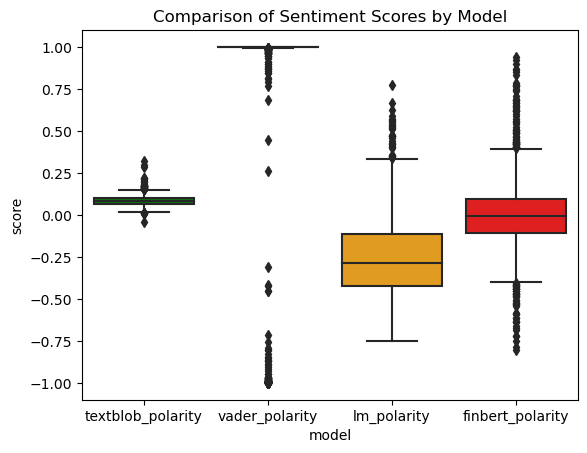

In [30]:
import seaborn as sns

# Melting the dataframe to have a long format suitable for comparison
melted_scores = all_speeches_scores.melt(id_vars=['reference', 'year'], value_vars=['textblob_polarity', 'vader_polarity', 'lm_polarity', 'finbert_polarity'],
                                         var_name='model', value_name='score')

# Define color palette with colorblind-friendly colors
colors = ["green", "blue", "orange", "red"]

# Plotting the sentiment scores by model with specified colors
sns.boxplot(data=melted_scores, x='model', y='score', palette=colors)
plt.title('Comparison of Sentiment Scores by Model')
plt.show()

#### Sentiment vs is_gov

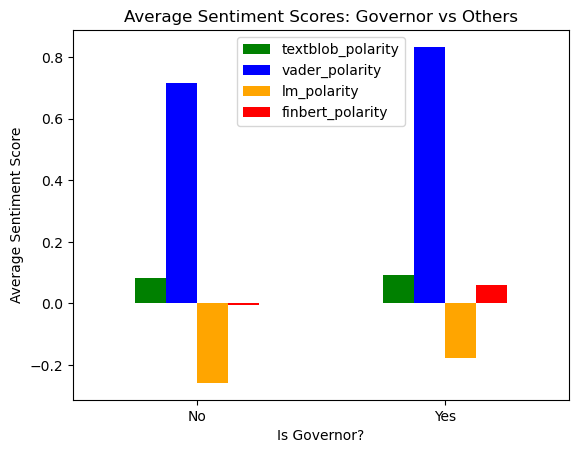

In [31]:
# Calculate average sentiment scores by government official status
gov_official_sentiment = all_speeches_scores.groupby('is_gov')[['textblob_polarity', 'vader_polarity', 'lm_polarity', 'finbert_polarity']].mean()

# Plotting with specified colors
gov_official_sentiment.plot(kind='bar', title='Average Sentiment Scores: Governor vs Others', color=['green', 'blue', 'orange', 'red'])

plt.xlabel('Is Governor?')
plt.ylabel('Average Sentiment Score')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

#### Sentiment Analysis Over Time

In [32]:
import matplotlib.pyplot as plt

# Group the data by year and calculate the mean of each sentiment score
yearly_sentiment = all_speeches_scores.groupby('year')[['textblob_polarity', 'vader_polarity', 'lm_polarity', 'finbert_polarity']].mean()

# Plotting the results with specified colors
yearly_sentiment.plot(title='Average Sentiment Scores by Year', color=['green', 'blue', 'orange', 'red'])
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


#### Histograms of sentiment scores

In [33]:
import numpy as np

# Calculate the number of bins for each sentiment score model separately using the square-root rule
num_bins_textblob = int(np.sqrt(all_speeches_scores['textblob_polarity'].size))
num_bins_vader = int(np.sqrt(all_speeches_scores['vader_polarity'].size))
num_bins_lm = int(np.sqrt(all_speeches_scores['lm_polarity'].size))
num_bins_finbert = int(np.sqrt(all_speeches_scores['finbert_polarity'].size))

print("TextBlob bins:", num_bins_finbert)
print("Vader bins:", num_bins_vader)
print("LM bins:", num_bins_lm)
print("FinBERT bins:", num_bins_finbert)

TextBlob bins: 34
Vader bins: 34
LM bins: 34
FinBERT bins: 34


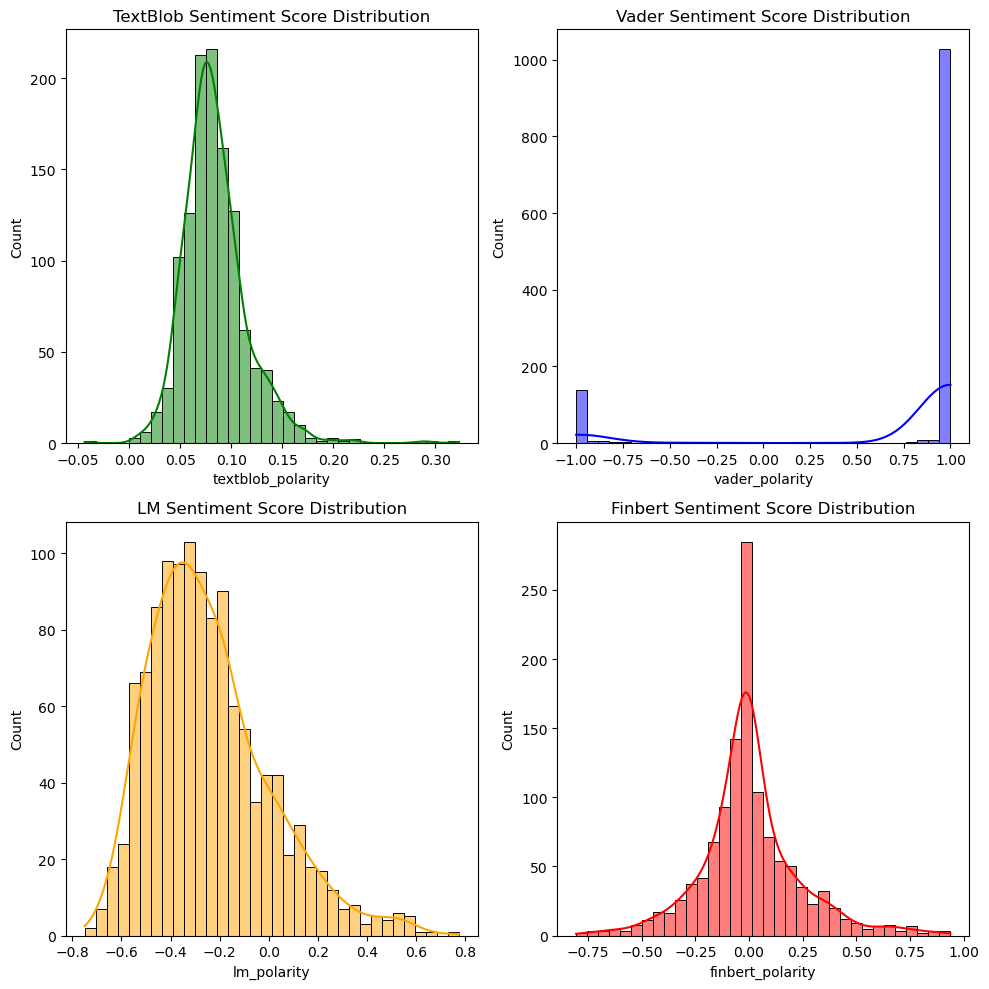

In [34]:
# Distribution plots for each sentiment score

# Create a square grid of plots
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Plotting TextBlob Sentiment Score Distribution
sns.histplot(all_speeches_scores['textblob_polarity'], bins=34, kde=True, ax=ax[0, 0], color='green')
ax[0, 0].set_title('TextBlob Sentiment Score Distribution')

# Plotting Vader Sentiment Score Distribution
sns.histplot(all_speeches_scores['vader_polarity'], bins=34, kde=True, ax=ax[0, 1], color='blue')
ax[0, 1].set_title('Vader Sentiment Score Distribution')

# Plotting LM Sentiment Score Distribution
sns.histplot(all_speeches_scores['lm_polarity'], bins=34, kde=True, ax=ax[1, 0], color='orange')
ax[1, 0].set_title('LM Sentiment Score Distribution')

# Plotting Finbert Sentiment Score Distribution
sns.histplot(all_speeches_scores['finbert_polarity'], bins=34, kde=True, ax=ax[1, 1], color='red')
ax[1, 1].set_title('Finbert Sentiment Score Distribution')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()

In [35]:
all_speeches_scores_daily

reference         country  \
1998-09-15  r980915a_BOE  United Kingdom   
1998-09-16  r980915a_BOE  United Kingdom   
1998-09-17  r980915a_BOE  United Kingdom   
1998-09-18  r980915a_BOE  United Kingdom   
1998-09-19  r980915a_BOE  United Kingdom   
...                  ...             ...   
2022-10-16  r221015a_BOE  United Kingdom   
2022-10-17  r221015a_BOE  United Kingdom   
2022-10-18  r221015a_BOE  United Kingdom   
2022-10-19  r221019a_BOE  United Kingdom   
2022-10-20  r221020a_BOE  United Kingdom   

                                                        title     author  \
1998-09-15                                             Speech     George   
1998-09-16                                             Speech     George   
1998-09-17                                             Speech     George   
1998-09-18                                             Speech     George   
1998-09-19                                             Speech     George   
...                                                       ...        ...   
2022-10-16  Monetary policy and financial stability interv...     Bailey   
2022-10-17  Monetary policy and financial stability interv...     Bailey   
2022-10-18  Monetary policy and financial stability interv...     Bailey   
2022-10-19  Governance of “Decentralised” Finance: Get up,...    Wilkins   
2022-10-20       The inflationary consequences of real shocks  Broadbent   

            is_gov  word_count Body     central_bank  year language  \
1998-09-15   False        2387  BOE  Bank of England  1998       en   
1998-09-16   False        2387  BOE  Bank of England  1998       en   
1998-09-17   False        2387  BOE  Bank of England  1998       en   
1998-09-18   False        2387  BOE  Bank of England  1998       en   
1998-09-19   False        2387  BOE  Bank of England  1998       en   
...            ...         ...  ...              ...   ...      ...   
2022-10-16    True        1767  BOE  Bank of England  2022       en   
2022-10-17    True        1767  BOE  Bank of England  2022       en   
2022-10-18    True        1767  BOE  Bank of England  2022       en   
2022-10-19   False        5382  BOE  Bank of England  2022       en   
2022-10-20   False        6035  BOE  Bank of England  2022       en   

            vader_polarity  lm_polarity  finbert_polarity date  
1998-09-15          0.9968    -0.418182         -0.269212  NaT  
1998-09-16          0.9968    -0.418182         -0.269212  NaT  
1998-09-17          0.9968    -0.418182         -0.269212  NaT  
1998-09-18          0.9968    -0.418182         -0.269212  NaT  
1998-09-19          0.9968    -0.418182         -0.269212  NaT  
...                    ...          ...               ...  ...  
2022-10-16         -0.9848    -0.600000         -0.070586  NaT  
2022-10-17         -0.9848    -0.600000         -0.070586  NaT  
2022-10-18         -0.9848    -0.600000         -0.070586  NaT  
2022-10-19          0.9999     0.287234          0.000144  NaT  
2022-10-20          0.9994    -0.306306          0.001301  NaT  

[8917 rows x 14 columns]

#### Descriptive statistics

Texblob

In [36]:
all_speeches_scores['textblob_polarity'].describe()

count    1209.000000
mean        0.084077
std         0.031670
min        -0.043709
25%         0.064897
50%         0.079922
75%         0.098878
max         0.323077
Name: textblob_polarity, dtype: float64

- Mean: The mean sentiment score is 0.084077, suggesting a generally neutral sentiment across the dataset, with a slight positive lean.
- Standard Deviation: The standard deviation is 0.031670, which is relatively small, indicating that the sentiment scores do not vary widely and tend to be close to the mean.
- Minimum: The lowest polarity score is -0.043709, showing that the most negative sentiment is only slightly below neutral.
- 25th Percentile: 25% of the scores are below 0.064897. Since this is above zero, it suggests that the lower quartile of data still leans towards the positive sentiment.
- Median (50th Percentile): The median score is 0.079922, which is close to the mean, further indicating a very slight positive sentiment trend.
- 75th Percentile: 75% of the scores are below 0.098878, and being above the median, this suggests that the upper quartile of the scores are more strongly positive but still fairly neutral.
- Maximum: The highest polarity score is 0.323077, which indicates the presence of some positive sentiments but nothing extremely positive.

Vader

In [37]:
all_speeches_scores['vader_polarity'].describe()

count    1209.000000
mean        0.735447
std         0.664696
min        -1.000000
25%         0.996400
50%         0.999400
75%         0.999800
max         1.000000
Name: vader_polarity, dtype: float64

- Mean: The average sentiment score is very high (0.735447), indicating a extremely positive sentiment across the dataset.
- Standard Deviation: The standard deviation is significant too (0.664696), suggesting a wide range of sentiment scores from highly negative to highly positive.
- Minimum: The lowest sentiment score is -1.000000, indicating the presence of extremely negative sentiments in some instances.
- 25th Percentile: This value is very high (0.996400), which is unusual for sentiment scores and suggests that 25% of the data has very high positive scores, just below the maximum. 
- Median (50th Percentile): The median is 0.999400, extremely close to the maximum, again showing a very strong positive sentiment within the dataset.
- 75th Percentile: With 75% of scores below 0.999800, we see that the vast majority of the dataset skews towards the maximum positive score.
- Maximum: The highest sentiment score is 1.000000, the highest possible score, indicating extremely positive sentiments.

Loughran McDonald

In [38]:
all_speeches_scores['lm_polarity'].describe()

count    1209.000000
mean       -0.245673
std         0.243331
min        -0.750000
25%        -0.421538
50%        -0.287356
75%        -0.117117
max         0.773585
Name: lm_polarity, dtype: float64

- Mean: The mean sentiment score is -0.245673, which is somewhat negative, suggesting a general negative sentiment across the dataset.
- Standard Deviation: The standard deviation is relatively high at 0.243331, indicating variability in sentiment across different texts.
- Minimum: The most negative sentiment score is -0.750000, showing that there are texts with a strongly negative sentiment.
- 25th Percentile: A quarter of the data falls below -0.421538, further emphasizing that a significant portion of the dataset contains fairly negative sentiments.
- Median (50th Percentile): The median score is -0.287356, confirming the negative trend observed in the mean.
- 75th Percentile: Three-quarters of the data has a polarity score above -0.117117, indicating that the most negative sentiments are not shared by all texts in the dataset.
- Maximum: The highest sentiment score is 0.773585, revealing that there are also instances of positive sentiment, although these are less frequent given the negative mean score.

FinBERT

In [39]:
all_speeches_scores['finbert_polarity'].describe()

count    1209.000000
mean        0.005142
std         0.234896
min        -0.805046
25%        -0.105807
50%        -0.004519
75%         0.093910
max         0.938213
Name: finbert_polarity, dtype: float64

- Mean: The average sentiment score is very close to zero (0.005142), indicating that overall sentiment across all speeches is almost neutral.
- Standard Deviation: A relatively high standard deviation (0.234896) suggests there's considerable variability in sentiment scores.
- Minimum: The most negative sentiment score is quite low (-0.805046), showing that there have been instances of strongly negative sentiment.
- 25th Percentile: 25% of the scores are lower than -0.105807, which could be considered mildly negative.
- Median (50th Percentile): The median sentiment score is slightly negative (-0.004519), reinforcing the mean's indication of a general tilt towards neutral sentiment.
- 75th Percentile: 75% of the scores are below 0.093910, indicating that more positive sentiments are not as extreme as the negative ones.
- Maximum: The most positive sentiment score is very high (0.938213), showing that there have also been instances of strongly positive sentiment

#### Adding defined periods to the plot

In [40]:
# Define the periods
periods = [
    ("Period 1", "1999", "2007-06-01"),
    ("Period 2", "2007-06-01", "2010-01-31"),
    ("Period 3", "2010-01-31", "2012-07-31"),
    ("Period 4", "2012-07-31", "2016-06-23"),
    ("Period 5", "2016-06-23", "2019-12-31"),
    ("Period 6", "2020-01-01", "2021-07-30"),
    ("Period 7", "2021-07-30", "2022-10-31")]

# Add key dates with labels
key_dates = {
    "Introduction of Euro": "1999-01-01",
    "Dot-com bubble burst": "2000-03-01",
    "9/11": "2001-09-11",
    "Onset of GFC": "2007-06-01",
    "Lehman Brothers Collapse": "2008-09-15",
    "Brexit Vote": "2016-06-23",
    "COVID-19 & BREXIT": "2020-01-01",
    "Russia invades Ukraine": "2022-02-24",
    "Truss/Kwarteng Mini Budget": "2022-09-23"     }

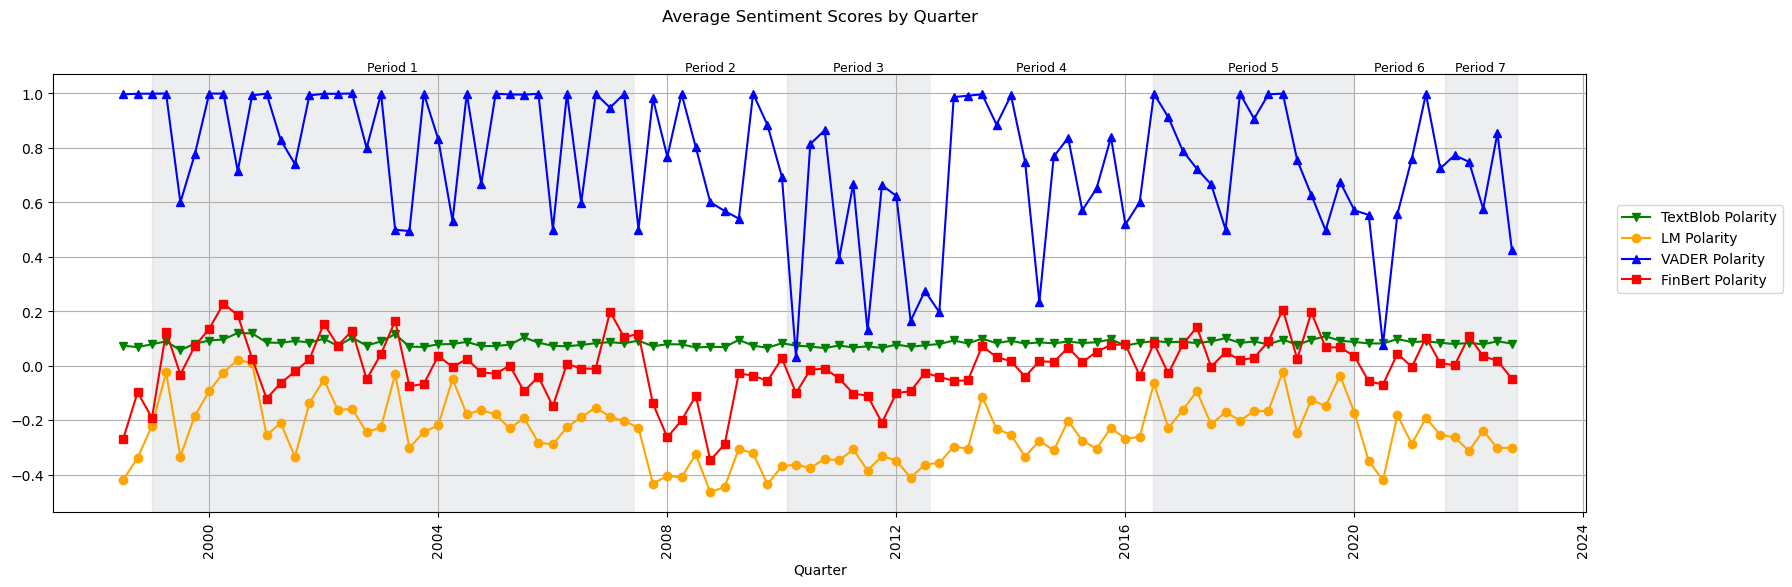

In [41]:
# Convert 'quarter' from Period to string for plotting
avg_polarity_by_quarter['quarter'] = pd.PeriodIndex(avg_polarity_by_quarter['quarter'], freq='Q').to_timestamp()

# Define colors for each sentiment score
colors = {
    'textblob': 'green',
    'lm': 'orange',
    'vader': 'blue',
    'finbert': 'red'
}

# Plotting setup
plt.figure(figsize=(18, 6))

# Plot each sentiment score with specified colors
plt.plot(avg_polarity_by_quarter['quarter'], avg_polarity_by_quarter['textblob_polarity'], label='TextBlob Polarity', color=colors['textblob'], marker='v')
plt.plot(avg_polarity_by_quarter['quarter'], avg_polarity_by_quarter['lm_polarity'], label='LM Polarity', color=colors['lm'], marker='o')
plt.plot(avg_polarity_by_quarter['quarter'], avg_polarity_by_quarter['vader_polarity'], label='VADER Polarity', color=colors['vader'], marker='^')
plt.plot(avg_polarity_by_quarter['quarter'], avg_polarity_by_quarter['finbert_polarity'], label='FinBert Polarity', color=colors['finbert'], marker='s')


# Shade and label the periods
for i, (period, start_date, end_date) in enumerate(periods):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    midpoint = start_date + (end_date - start_date) / 2
    color = '#C4C9CE' if i % 2 == 0 else 'white'
    plt.axvspan(start_date, end_date, color=color, alpha=0.3)
    y_coord = plt.gca().get_ylim()[1] * 1.02  # Adjust y-coordinate for all periods
    plt.text(midpoint, y_coord, period, horizontalalignment='center', verticalalignment='center', fontsize=9)

# Plot adjustments
plt.title('Average Sentiment Scores by Quarter')
plt.xlabel('Quarter')
plt.title('Average Sentiment Scores by Quarter', y=1.1)
plt.xticks(rotation=90)
plt.legend(loc=(1.02, 0.5))
plt.grid(True)

plt.tight_layout()
plt.show()

### Just FinBERT as our main model

### Yearly average

In [42]:
# Convert 'quarter' to year (assuming 'quarter' is a PeriodIndex or can be converted to one)
avg_polarity_by_quarter['year'] = avg_polarity_by_quarter['quarter'].dt.to_period('Y')

# Group by year and take the average of the FinBert polarity scores
avg_polarity_by_year = avg_polarity_by_quarter.groupby('year')['finbert_polarity'].mean().reset_index()

# Convert 'year' from Period to datetime for plotting
avg_polarity_by_year['year'] = avg_polarity_by_year['year'].dt.to_timestamp()

# Plotting setup
plt.figure(figsize=(14, 6))

# Plot yearly FinBERT sentiment score
plt.plot(avg_polarity_by_year['year'], avg_polarity_by_year['finbert_polarity'], label='FinBert Polarity', color='red', marker='s')

# Plot adjustments
plt.title('Average FinBert Sentiment Scores by Year', y=1.1)
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.grid(True)

# Create a range of dates with a frequency of every 2 years
x_ticks = pd.date_range(start=avg_polarity_by_year['year'].min(), 
                        end=avg_polarity_by_year['year'].max(), 
                        freq='1YS').strftime('%Y').tolist()

# Set x-axis ticks to be every two years
plt.xticks(ticks=pd.to_datetime(x_ticks), labels=x_ticks, rotation=90)

# Shade and label the periods
for i, (period, start_date, end_date) in enumerate(periods):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    midpoint = start_date + (end_date - start_date) / 2
    color = '#C4C9CE' if i % 2 == 0 else 'white'
    plt.axvspan(start_date, end_date, color=color, alpha=0.3)
    
    # Adjust y-coordinate for all periods
    y_coord = plt.gca().get_ylim()[1] * 1.08  # Move to the top of the plot
    plt.text(midpoint, y_coord, period,
             horizontalalignment='center',
             verticalalignment='center', fontsize=9)

for label, date in key_dates.items():
    date = pd.to_datetime(date)
    plt.axvline(date, color='#0000FF', linestyle='--')
    plt.text(x=date + pd.DateOffset(days=50),
             y=plt.gca().get_ylim()[1] * 0.95,
             s=label, rotation=90,
             verticalalignment='top', fontsize=9)
    
plt.tight_layout()
plt.show()

In [43]:
# Find the latest date in the 'quarter' column with a 'finbert_polarity' score
latest_quarter = avg_polarity_by_quarter.loc[avg_polarity_by_quarter['finbert_polarity'].notna(), 'quarter'].max()

# Convert to a string for easy reading, if necessary
latest_quarter_str = latest_quarter.strftime('%Y-%m-%d')

print(f"The last recorded speech was in the quarter ending on {latest_quarter_str}.")

The last recorded speech was in the quarter ending on 2022-10-01.


This is why the last speech falls short on the yearly column

### Quarterly average

In [44]:
# Highlighting key dates and giving them positions on the plot
key_dates_with_coords = {
    "Introduction of Euro": ("1999-01-01", 0.25),
    "Dot-com bubble burst": ("2000-03-01", 0.32),
    "9/11": ("2001-09-11", 0.25),
    "Onset of GFC": ("2007-06-01", 0.18),
    "Lehman Brothers Collapse": ("2008-09-15", 0.8),
    "Brexit Vote": ("2016-06-23", 0.21),
    "COVID-19 & BREXIT": ("2020-01-01", 0.3),
    "Russia invades Ukraine": ("2022-02-24", 0.25),
    "Truss/Kwarteng Mini Budget": ("2022-09-23", 0.35)
}
# Define colors for each sentiment score
colors = {
    'textblob': 'green',
    'lm': 'orange',
    'vader': 'blue',
    'finbert': 'red'
}

# Plotting setup
plt.figure(figsize=(14, 6))

# Plot FinBERT sentiment score with specified colors
plt.plot(avg_polarity_by_quarter['quarter'], avg_polarity_by_quarter['finbert_polarity'], label='FinBert Polarity', color=colors['finbert'], marker='s')


# Shade and label the periods
for i, (period, start_date, end_date) in enumerate(periods):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    midpoint = start_date + (end_date - start_date) / 2
    color = '#C4C9CE' if i % 2 == 0 else 'white'
    plt.axvspan(start_date, end_date, color=color, alpha=0.3)
    
    # Adjust y-coordinate for all periods
    y_coord = plt.gca().get_ylim()[1] * 1.08 
    plt.text(midpoint, y_coord, period,
             horizontalalignment='center',
             verticalalignment='center', fontsize=9)
    
# Plot key dates and labels with specified coordinates
for label, (date_str, y_coord_factor) in key_dates_with_coords.items():
    date = pd.to_datetime(date_str)
    plt.axvline(date, color='#007BFF', linestyle='--', alpha=0.7)

    # Calculate the absolute y-coordinate based on the factor and y-axis limits
    y_coord = plt.gca().get_ylim()[0] + (plt.gca().get_ylim()[1] - plt.gca().get_ylim()[0]) * (y_coord_factor + 0.1)

    # Add text label at specified x and y coordinates
    plt.text(x=date + pd.DateOffset(days=50),  # Offset by 50 days
             y=y_coord,
             s=label, rotation=90, verticalalignment='top',
             fontsize=9, alpha=1)

# Add a dashed line for neutral sentiment
plt.axhline(y=0, color='#800080', linestyle='--', label='Neutral')

# Plot adjustments
plt.title('Average Sentiment Scores by Quarter', y=1.1)
plt.xlabel('Quarter')
plt.ylabel('FinBert Sentiment Score')
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

# Create a range of dates with a frequency of every 2 years
x_ticks = pd.date_range(start=avg_polarity_by_quarter['quarter'].min(), 
                        end=avg_polarity_by_quarter['quarter'].max(), 
                        freq='2YS')

# Set x-axis ticks to be every two years
plt.xticks(ticks=x_ticks, labels=[tick.strftime('%Y') for tick in x_ticks], rotation=90)

plt.tight_layout()
plt.show()